<a href="https://colab.research.google.com/github/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/blob/main/Analise_Exploratoria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUICÍDIOS NO BRASIL: ANÁLISE EXPLORATÓRIA DE DADOS


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')


In [73]:
#Aqauisição dos dados
df = pd.read_csv('https://raw.githubusercontent.com/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/main/master.csv')

In [74]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710000,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190000,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830000,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590000,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280000,Albania1987,NaN,"2,156,624,900",796,Boomers


In [75]:
#Verificamos a estrutura do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [76]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,27820.000000,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1844793.617398,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3911779.441756,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,278.000000,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,97498.500000,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,430150.000000,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1486143.250000,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,43805214.000000,224.970000,0.944000,126352.000000


In [77]:
#Verificamso valores nulos
df.isnull().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


##Países com maiores numeros de Suícidios entre 1985-2016

In [81]:
total_suicidios = df.groupby('country')['suicides_no'].sum().reset_index().sort_values(by = 'suicides_no', ascending=False).head(10)

In [82]:
total_suicidios

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


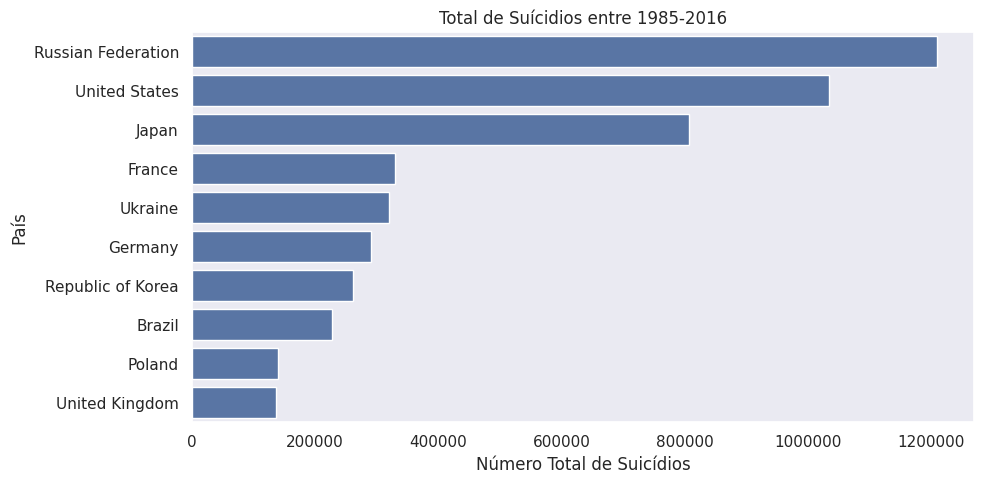

In [88]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y = total_suicidios['country'], x = total_suicidios['suicides_no'])
plt.xlabel('Número Total de Suicídios')
plt.ylabel('País')
plt.title('Total de Suícidios entre 1985-2016')
ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()